# WIP: Should be able to properly convert bits to $\frac{m}{s^2}$or g's. All you need is two text files to analyze, one with device stationary facing down and one with the device stationary facing up.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use('dark_background')

In [53]:
# the following is based off of https://gist.github.com/ariutti/80173ac6fa1acef4c7ab2a9aecf038a5
def twoscomplement(x, num_bits):
    # both input vars are ints
    TC = (-1)*(2**num_bits - x)
    return TC

# example:
# n = int('10000001', 2)
# print(twoscomplement(n, 8))

In [60]:
path_up = input('path to file of up-facing data: ')
path_down = input('paht fo file of down-facing data: ')
# somehow input gets rid of problems with special characters (e.g., spaces) in the path

path to file of up-facing data:  C:\Users\mhanr\Desktop\Actual Life\first_try.txt
paht fo file of down-facing data:  C:\Users\mhanr\Desktop\Actual Life\down_data.txt


In [61]:
# turn all the data into numpy arrays
# there is likely a much faster way to do this but I don't care (yet)
all_data_up = np.genfromtxt(path_up, delimiter = ' ', skip_footer = 0) 
all_data_down = np.genfromtxt(path_down, delimiter = ' ', skip_footer = 0) 

# for some reason count = all_data[:,0] would read it as a list of nan's
# so I'm just using arange to avoid that
count = np.arange(0,1000, 1) 
timestamp_up = all_data_up[:,1]
x_up_accel_bits = all_data_up[:,2]
y_up_accel_bits = all_data_up[:,3]
z_up_accel_bits = all_data_up[:,4]

timestamp_down = all_data_down[:,1]
x_down_accel_bits = all_data_down[:,2]
y_down_accel_bits = all_data_down[:,3]
z_down_accel_bits = all_data_down[:,4]

# we'll ignore gyroscopic acceleration for now!

In [62]:
# these data were taken with the device stationary on a table
# we therefore have a guess calibration factor
g = 9.80152 # from https://www.ngs.noaa.gov/cgi-bin/grav_pdx.prl using my local coordinates and height
delta_g = 0.00106 # may use this later

g_bits = (np.average(z_up_accel_bits) + np.average(z_down_accel_bits))/2.
z_offset_bits = (np.average(z_down_accel_bits) + np.average(z_up_accel_bits))/2.
M_S_2_PER_BIT = g/g_bits

# for linear acceleration, we can convert the bits to m/s^2
x_accel_up = x_up_accel_bits*M_S_2_PER_BIT
y_accel_up = y_up_accel_bits*M_S_2_PER_BIT
z_accel_up = z_up_accel_bits*M_S_2_PER_BIT

x_accel_down = x_down_accel_bits*M_S_2_PER_BIT
y_accel_down = y_down_accel_bits*M_S_2_PER_BIT
z_accel_down = z_down_accel_bits*M_S_2_PER_BIT

In [63]:
# make the residual arrays for plotting
x_a_resid_up = np.array(x_accel_up - np.average(x_accel_up))
y_a_resid_up = np.array(y_accel_up - np.average(y_accel_up))
z_a_resid_up = np.array(z_accel_up - np.average(z_accel_up))

x_a_resid_down = np.array(x_accel_down - np.average(x_accel_down))
y_a_resid_down = np.array(y_accel_down - np.average(y_accel_down))
z_a_resid_down = np.array(z_accel_down - np.average(z_accel_down))

In [64]:
# # now make the plots 
# fig, ax = plt.subplots(1,3, figsize = (30,10))
# ax[0].scatter(count, x_a_resid_up, c = 'r', s= 2)
# ax[1].scatter(count, y_a_resid_up, c = 'g', s= 2)
# ax[2].scatter(count, z_a_resid_up, c = 'b', s= 2)

# ax[0].set_title('X accel (readings - mean)')
# ax[1].set_title('Y| accel (readings - mean)')
# ax[2].set_title('Z accel (readings - mean)')


# # put mean and 2 sigma on each plot in one for loop:
accel_list_up = [x_accel_up, y_accel_up, z_accel_up]
resid_list_up = [x_a_resid_up, y_a_resid_up, z_a_resid_up]

accel_list_down = [x_accel_down, y_accel_down, z_accel_down]
resid_list_down = [x_a_resid_down, y_a_resid_down, z_a_resid_down]
# for i in range(3):
#     textstr = '\n'.join((
#     r'mean=%.2f' % (np.average(accel_list_up[i])),
#     r'$2\sigma=%.2f$' % (2*np.std(accel_list_up[i]), )))
#     ax[i].text(3, np.max(resid_list_up[i]), textstr, fontsize=14,
#     verticalalignment='top')

# for x in ax.flat:
#     x.set(xlabel='Count', ylabel='Reading ($m/s^2$)')

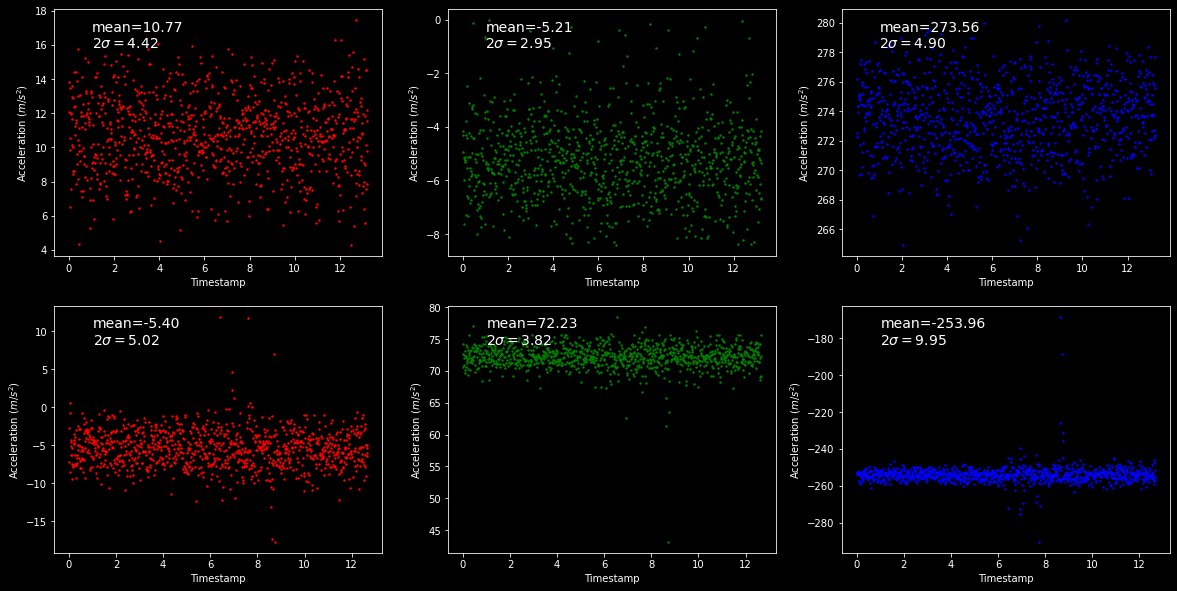

In [68]:
# now plot acceleratinos with respect to time
# from the text files I had this notebook examine, I think reasonable
# values will be where z-up is -9.8, z-down is 9.8, and the rest are 0ish
fig, ax = plt.subplots(2,3, figsize = (20,10))
ax[0,0].scatter(timestamp_up, x_accel_up, c = 'r', s= 2)
ax[0,1].scatter(timestamp_up, y_accel_up, c = 'g', s= 2)
ax[0,2].scatter(timestamp_up, z_accel_up, c = 'b', s= 2)

ax[1,0].scatter(timestamp_down, x_accel_down, c = 'r', s= 2)
ax[1,1].scatter(timestamp_down, y_accel_down, c = 'g', s= 2)
ax[1,2].scatter(timestamp_down, z_accel_down, c = 'b', s= 2)

for x in ax.flat:
    x.set(xlabel='Timestamp', ylabel='Acceleration ($m/s^2$)')
    
for i in range(3):
    textstr = '\n'.join((
    r'mean=%.2f' % (np.average(accel_list_up[i])),
    r'$2\sigma=%.2f$' % (np.std(2* accel_list_up[i]), )))
    ax[0,i].text(1, np.max(accel_list_up[i]), textstr, fontsize=14,
    verticalalignment='top')
    
for i in range(3):
    textstr = '\n'.join((
    r'mean=%.2f' % (np.average(accel_list_down[i])),
    r'$2\sigma=%.2f$' % (np.std(2* accel_list_down[i]), )))
    ax[1,i].text(1, np.max(accel_list_down[i]), textstr, fontsize=14,
    verticalalignment='top')

# Well, this is embarassing! None of the values are as we'd expect. I have calibrated incorrectly and will revist this on Monday.
The one thing that looks correct is that the z-accel in the up-direction is much higher than the z-accel in every other direction. 